Title : Analyzing Weather Data from OpenWeatherMap API


In [3]:
import requests 
import pandas as pd 
import datetime

In [5]:
# Set your OpenWeatherMap API key
api_key = 'fb365aa6104829b44455572365ff3b4e' 

In [7]:
# Set the location for which you want to retrieve weather data 
lat = 18.184135
lon = 74.610764

In [9]:
# https://openweathermap.org/api/one-call-3
# how	How to use api call 
# Construct the API URL
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

In [11]:
# Send a GET request to the API 
response = requests.get(api_url)
weather_data = response.json()
weather_data.keys()
len(weather_data['list'])
weather_data['list'][0]['weather'][0]['description']

'light rain'

In [13]:
# Getting the data from dictionary and taking into one variable 
# Extract relevant weather attributes using list comprehension
temperatures = [item['main']['temp'] for item in weather_data['list']] 

# It will extract all values (40) and putting into one variable
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

In [15]:
# Create a pandas DataFrame with the extracted weather data
weather_df = pd.DataFrame({'Timestamp': timestamps, 
                           'Temperature': temperatures, 
                           'humidity': humidity, 
                           'wind_speed':wind_speed,
                           'weather_description': weather_description})

In [17]:
# Set the Timestamp column as the DataFrame's index
weather_df.set_index('Timestamp', inplace=True)
max_temp = weather_df['Temperature'].max()
print(f"Maximum Temperature - {max_temp}")
min_temp = weather_df['Temperature'].min()
print(f"Minimum Temperature - {min_temp}")

Maximum Temperature - 303.88
Minimum Temperature - 294.11


In [19]:
# Clean and preprocess the data # Handling missing values
weather_df.fillna(0, inplace=True) # Replace missing values with 0 or appropriate value

In [21]:
# Handling inconsistent format (if applicable)
weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float)else x)

In [23]:
# Convert temperature from Kelvin to Celsius
# Print the cleaned and preprocessed data print(weather_df)
print(weather_df)

                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2025-10-08 21:00:00        25.57        67        2.18          light rain
2025-10-09 00:00:00        24.17        68        3.01       broken clouds
2025-10-09 03:00:00        25.09        57        3.52          few clouds
2025-10-09 06:00:00        28.35        45        2.81          few clouds
2025-10-09 09:00:00        30.16        41        2.91           clear sky
2025-10-09 12:00:00        29.64        42        3.11           clear sky
2025-10-09 15:00:00        26.89        53        3.38    scattered clouds
2025-10-09 18:00:00        25.81        55        4.57       broken clouds
2025-10-09 21:00:00        23.16        63        2.09       broken clouds
2025-10-10 00:00:00        21.78        65        2.25    scattered clouds
2025-10-10 03:00:00        24.06        53        2.78           clear sky
2025-10-10 06:00:00      

In [27]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

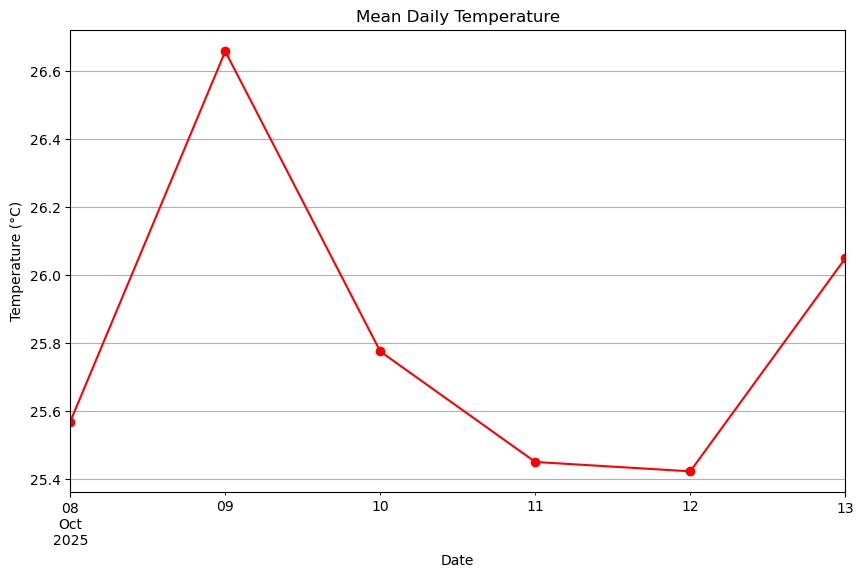

In [29]:
# Plot the mean daily temperature over time (Line plot)
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

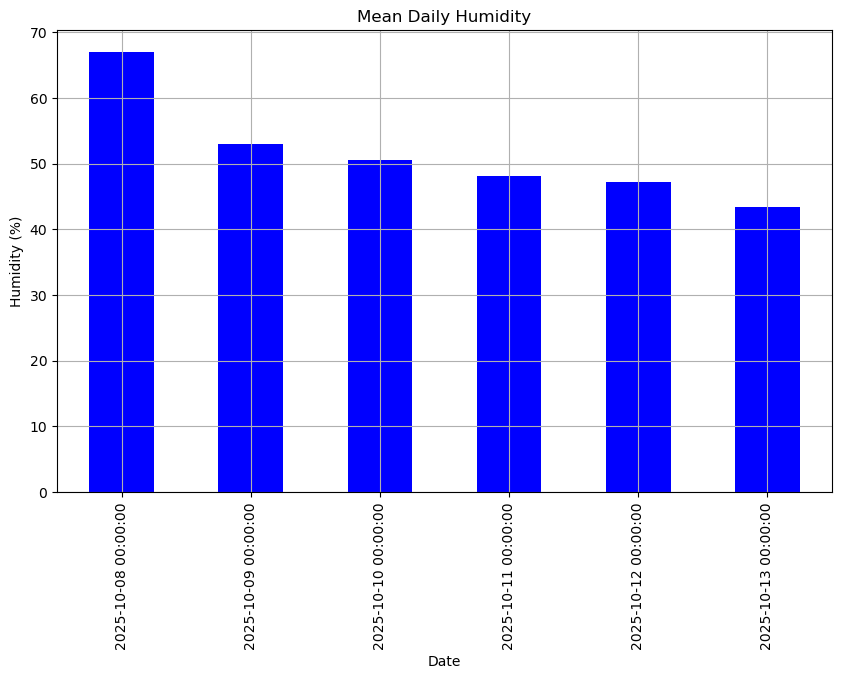

In [31]:
# Plot the mean daily humidity over time (Bar plot)
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

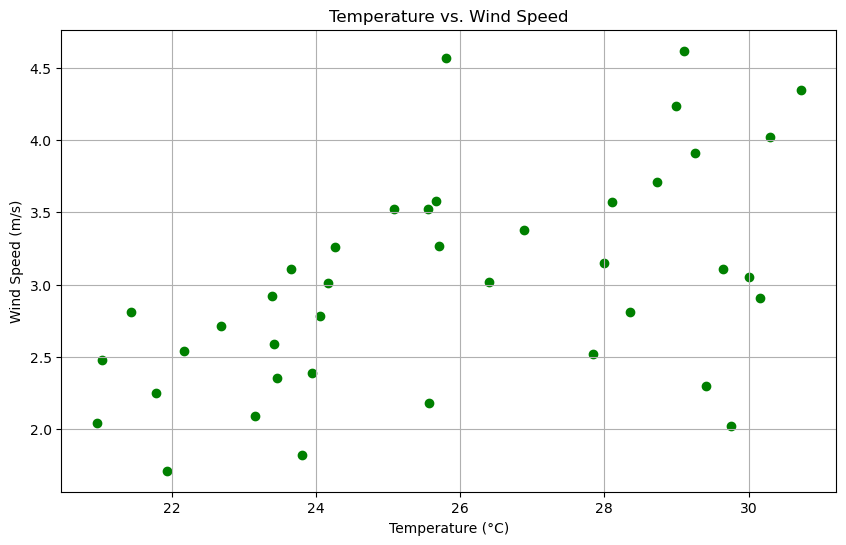

In [33]:
# Plot the relationship between temperature and wind speed (Scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

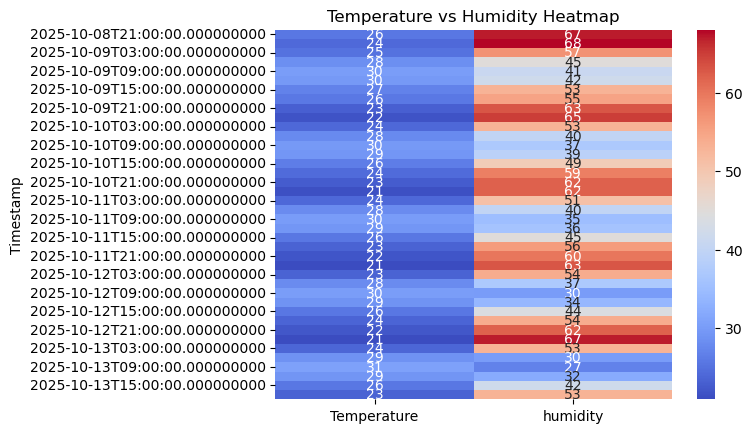

In [35]:
# Heatmap
import seaborn as sns
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

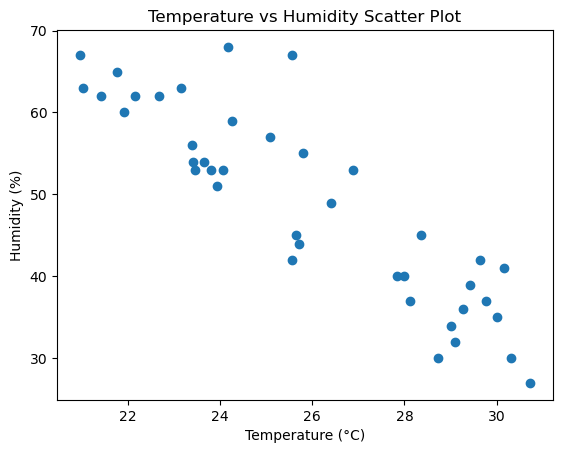

In [37]:
# Create a scatter plot to visualize the relationship between temperature and humidity
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()